In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df= pd.read_excel('Raw data.xlsx', sheet_name='S2')
data_name= pd.read_excel('Raw data.xlsx', sheet_name='Name')
df

,Date,BC,CM,ĐL,ĐN,HN,HU,LC,NĐ,NT,PL,QN,SL,TQ,VH,VT
0,2002-01-01,5.0,4.0,NaN,33.0,9.0,73.0,73.0,4.0,1.0,NaN,15.0,61.0,31.0,24.0,NaN
1,2002-02-01,21.0,NaN,14.0,64.0,24.0,31.0,53.0,8.0,NaN,NaN,NaN,22.0,25.0,32.0,NaN
2,2002-03-01,12.0,1.0,120.0,4.0,11.0,22.0,78.0,19.0,NaN,1.0,4.0,55.0,61.0,84.0,NaN
3,2002-04-01,17.0,4.0,102.0,113.0,59.0,56.0,114.0,46.0,18.0,19.0,27.0,65.0,61.0,46.0,5.0
4,2002-05-01,413.0,274.0,123.0,39.0,214.0,242.0,341.0,366.0,53.0,270.0,50.0,328.0,241.0,263.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2022-08-01,708.4,228.3,280.6,187.0,486.3,157.5,257.9,515.0,154.5,342.3,64.8,333.6,447.8,166.3,225.0
248,2022-09-01,461.2,409.2,293.7,419.4,242.0,448.8,166.1,653.0,81.9,598.5,509.7,167.1,301.1,1166.7,265.1
249,2022-10-01,210.2,352.7,159.5,1219.6,84.4,1366.5,72.9,285.2,436.9,89.3,577.4,3.8,35.4,352.0,363.1
250,2022-11-01,34.9,313.3,99.1,156.6,7.8,226.4,111.0,87.0,333.9,33.8,421.0,51.1,11.2,718.6,86.4


In [3]:
data_name

,Name,Symbol
0,Bãi Cháy,BC
1,Cà Mau,CM
2,Đà Lạt,ĐL
3,Đà Nẵng,ĐN
4,Hà Nội,HN
5,Huế,HU
6,Lai Châu,LC
7,Nam Định,NĐ
8,Nha Trang,NT
9,Pleiku,PL


In [4]:
dafa=pd.DataFrame()
for k in range(len(data_name['Symbol'])):
        Value_Rainfall=[]
        for i in range(12):
                a=[]
                for j in range(21):
                        a.append(df[data_name['Symbol'][k]][i+j*12])
                Value_Rainfall.append(a)
        if np.isnan(sum(df[data_name['Symbol'][k]])):
                Filling_Value=np.argwhere(np.isnan(Value_Rainfall))
                for i in range(len(Filling_Value)):
                        Value_Rainfall[Filling_Value[i][0]][Filling_Value[i][1]]=np.nanmean(Value_Rainfall[Filling_Value[i][0]])
        Value_Filled=[]
        for j in range(21):
                for i in range(12):
                        Value_Filled.append(Value_Rainfall[i][j].round(2))
        dafa[data_name['Name'][k]]=Value_Filled
dafa

,Bãi Cháy,Cà Mau,Đà Lạt,Đà Nẵng,Hà Nội,Huế,Lai Châu,Nam Định,Nha Trang,Pleiku,Quy Nhơn,Sơn La,Tuyên Quang,Vinh,Vũng Tàu
0,5.0,4.00,10.74,33.0,9.0,73.0,73.0,4.0,1.00,2.10,15.00,61.0,31.0,24.0,10.84
1,21.0,28.41,14.00,64.0,24.0,31.0,53.0,8.0,14.39,5.97,25.78,22.0,25.0,32.0,9.03
2,12.0,1.00,120.00,4.0,11.0,22.0,78.0,19.0,37.48,1.00,4.00,55.0,61.0,84.0,10.83
3,17.0,4.00,102.00,113.0,59.0,56.0,114.0,46.0,18.00,19.00,27.00,65.0,61.0,46.0,5.00
4,413.0,274.00,123.00,39.0,214.0,242.0,341.0,366.0,53.00,270.00,50.00,328.0,241.0,263.0,126.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,708.4,228.30,280.60,187.0,486.3,157.5,257.9,515.0,154.50,342.30,64.80,333.6,447.8,166.3,225.00
248,461.2,409.20,293.70,419.4,242.0,448.8,166.1,653.0,81.90,598.50,509.70,167.1,301.1,1166.7,265.10
249,210.2,352.70,159.50,1219.6,84.4,1366.5,72.9,285.2,436.90,89.30,577.40,3.8,35.4,352.0,363.10
250,34.9,313.30,99.10,156.6,7.8,226.4,111.0,87.0,333.90,33.80,421.00,51.1,11.2,718.6,86.40


In [5]:
#Output by excel file
dafa.to_excel('New data.xlsx', sheet_name='Data')  

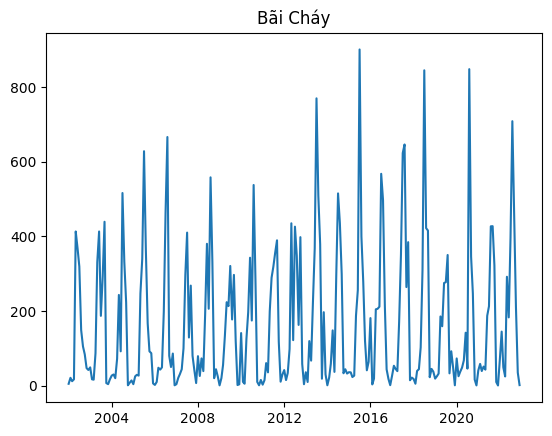

<Figure size 2100x2000 with 0 Axes>

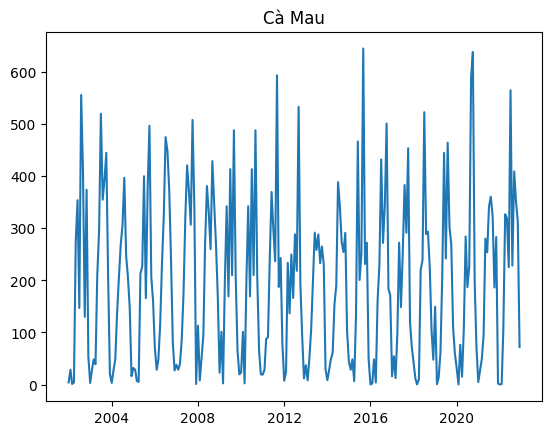

<Figure size 2100x2000 with 0 Axes>

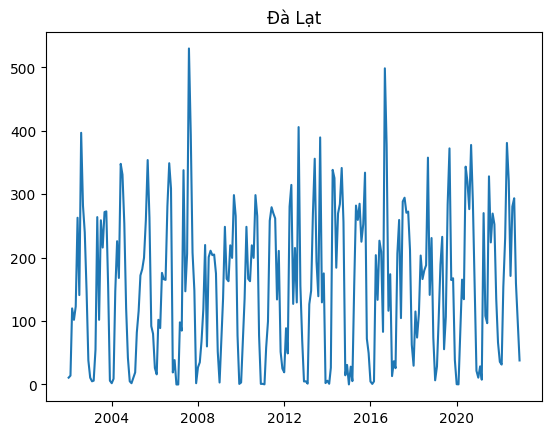

<Figure size 2100x2000 with 0 Axes>

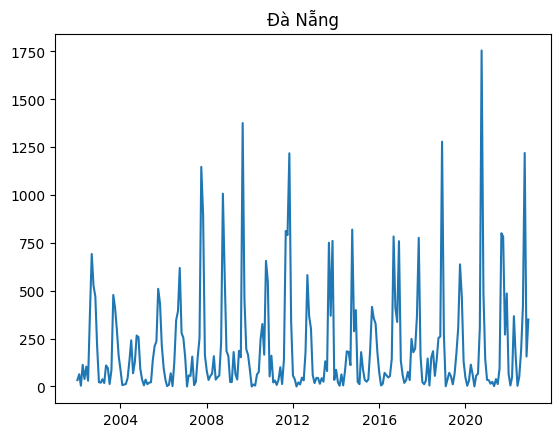

<Figure size 2100x2000 with 0 Axes>

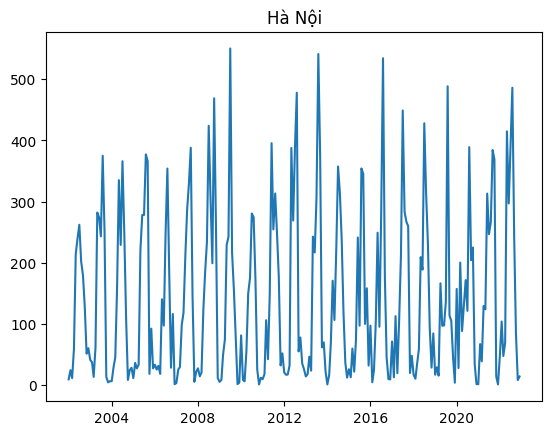

<Figure size 2100x2000 with 0 Axes>

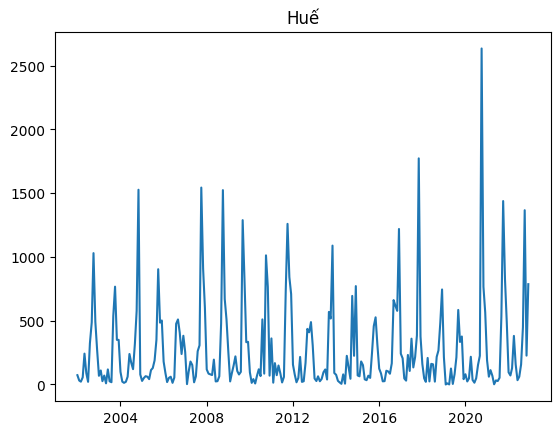

<Figure size 2100x2000 with 0 Axes>

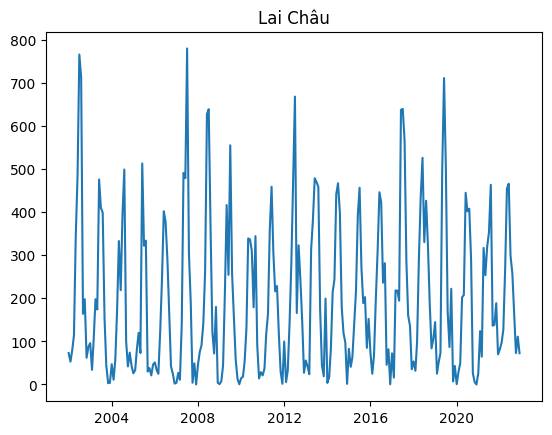

<Figure size 2100x2000 with 0 Axes>

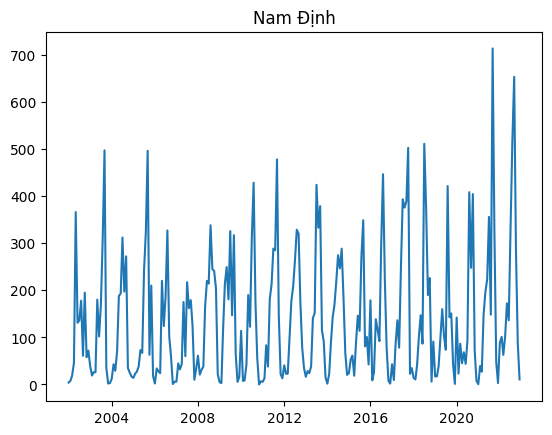

<Figure size 2100x2000 with 0 Axes>

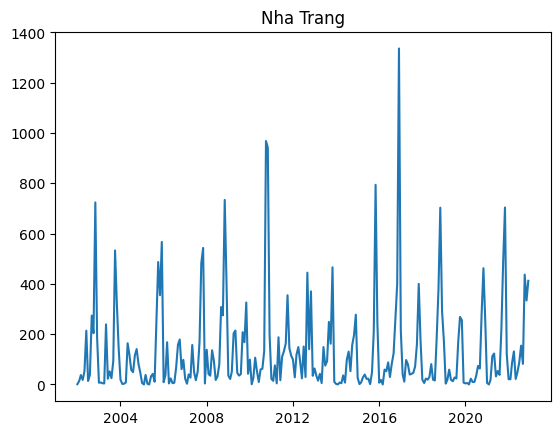

<Figure size 2100x2000 with 0 Axes>

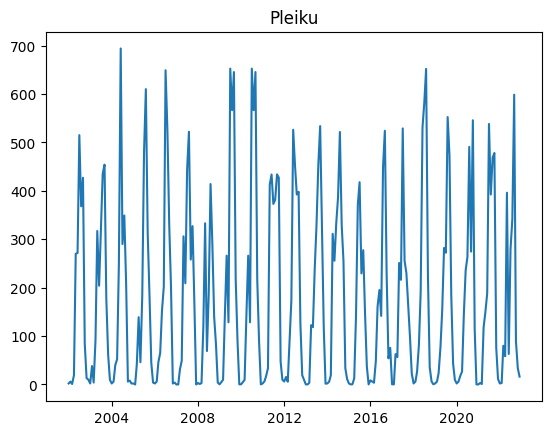

<Figure size 2100x2000 with 0 Axes>

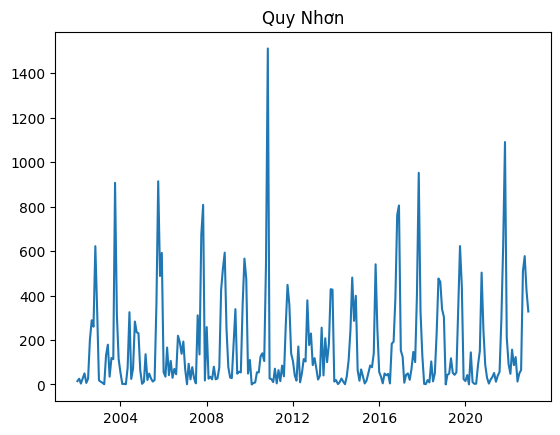

<Figure size 2100x2000 with 0 Axes>

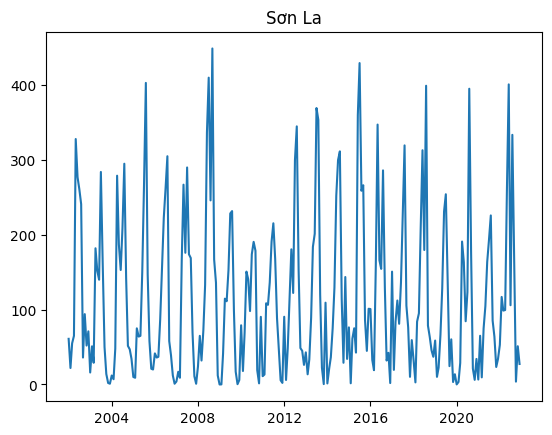

<Figure size 2100x2000 with 0 Axes>

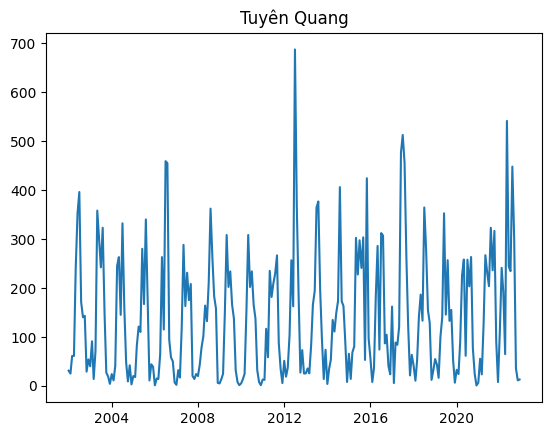

<Figure size 2100x2000 with 0 Axes>

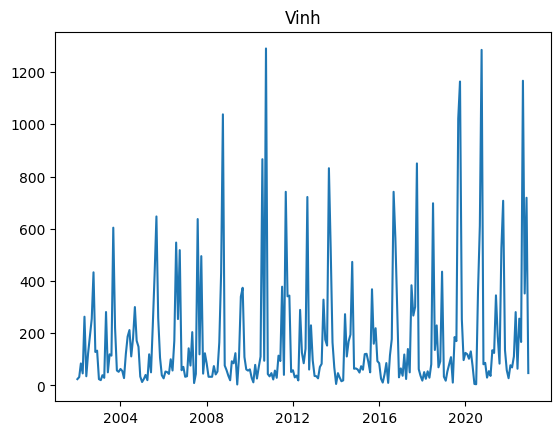

<Figure size 2100x2000 with 0 Axes>

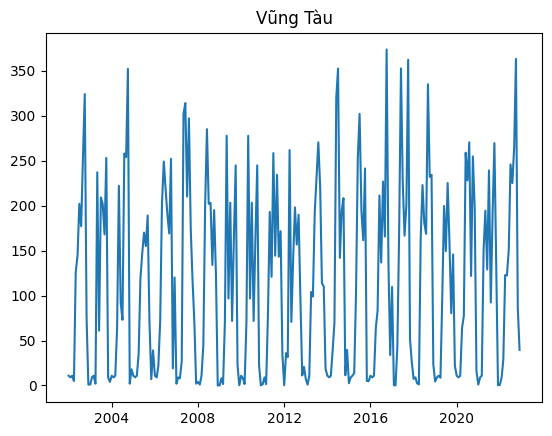

<Figure size 2100x2000 with 0 Axes>

In [6]:
#Draw the table with time series
dafa.index=df["Date"]
from matplotlib.pyplot import figure
for i in range(len(data_name['Symbol'])):
          plt.plot(dafa[data_name['Name'][i]])
          plt.title(data_name['Name'][i])
          plt.figure(figsize=(21, 20))
          plt.show()